# Draw multiple curves for comparation
### 1 search training logs including a specific string
### 2 draw validation curves of acc and loss on respective plots

In [87]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [100]:
path = 'E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\50k'
char = 'vgg16_fc_'
char2 = '64'

In [101]:
fname = []

for root, dirs, files in os.walk(path, topdown = False):
    for name in files:
        if name.endswith('.csv'):
            if (char in name) & (char2 in name) :
#             if char in name:
                fname.append(os.path.join(root, name))

In [102]:
def extractinfo(fname):
    loss = []
    val_loss = []
    acc = []
    val_acc = []
        
    label = os.path.splitext(os.path.basename(fname))[0][:-9]

    with open(fname, errors='ignore') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                loss.append(row['loss'])
                val_loss.append(row['val_loss'])
                acc.append(row['acc'])
                val_acc.append(row['val_acc'])
                line_count += 1

    loss=np.array(loss, dtype=np.float32)#to use matplotlib, has to change list to np.array, otherwise the y axis will be autoscaled
    val_loss=np.array(val_loss, dtype=np.float32)
    acc=np.array(acc, dtype=np.float32)
    val_acc=np.array(val_acc, dtype=np.float32)

    return loss, val_loss, acc, val_acc, label

In [103]:
def colorhex(number_of_colors):
    if number_of_colors > 8:
#         #generate hex formatted color
#         color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                  for i in range(number_of_colors)]
        colors = ['#276870','#f9adbe','#c0ffbf','#d5cab0','#fec5e8','#ef242e','#94d7d6','#f9fb03','#bd40b1', '#0d53ea', '#51132c', '#9cd2a2']
        random.shuffle(colors)
        color = colors[0:number_of_colors]
        return(color)
    else:
        color = []
        colors = "bgrcmykw"
        for i in range(number_of_colors):
            color.append(colors[i])
        return(color)


#f9adbe 
#57f718 
#fcc8de 
#d08895 
#e57696 
#8e5f78 
#410f01 
#01410f 
 
#013341 
#14fdef 
 
#d2c1c6 
#f1eae8 
#73736f 
#002251 
#08876e 
#e41937 
#008447 
#0d223f 
#0b203d 
 
 
#002d62 
#012b5d 
#008651 
 
 
#003366 
#b3252c 
#044714

In [104]:
def plotloss(fname, n):
    loss, val_loss, acc, val_acc, label = extractinfo(fname)
    epochs=range(1, len(acc)+1)
#     plt.plot(epochs,loss,color=color[n],linestyle='dashed',label='loss_'+label)
    plt.plot(epochs, val_loss,color=color[n],label=label)
    index=np.where(val_loss==np.amin(val_loss))
    for i in index:
        plt.text(epochs[int(i)], val_loss[int(i)], str((epochs[int(i)], val_loss[int(i)])),color=color[n])
    return index[0]

In [105]:
def plotacc(fname, n, index):
    loss, val_loss, acc, val_acc, label = extractinfo(fname)
    epochs=range(1, len(acc)+1)
#     plt.plot(epochs,acc,color=color[n],linestyle='dashed',label='acc_'+label)
    plt.plot(epochs, val_acc,color=color[n],label=label)
    plt.text(epochs[int(index)], val_acc[int(index)], str((epochs[int(index)], val_acc[int(index)])),color=color[n])

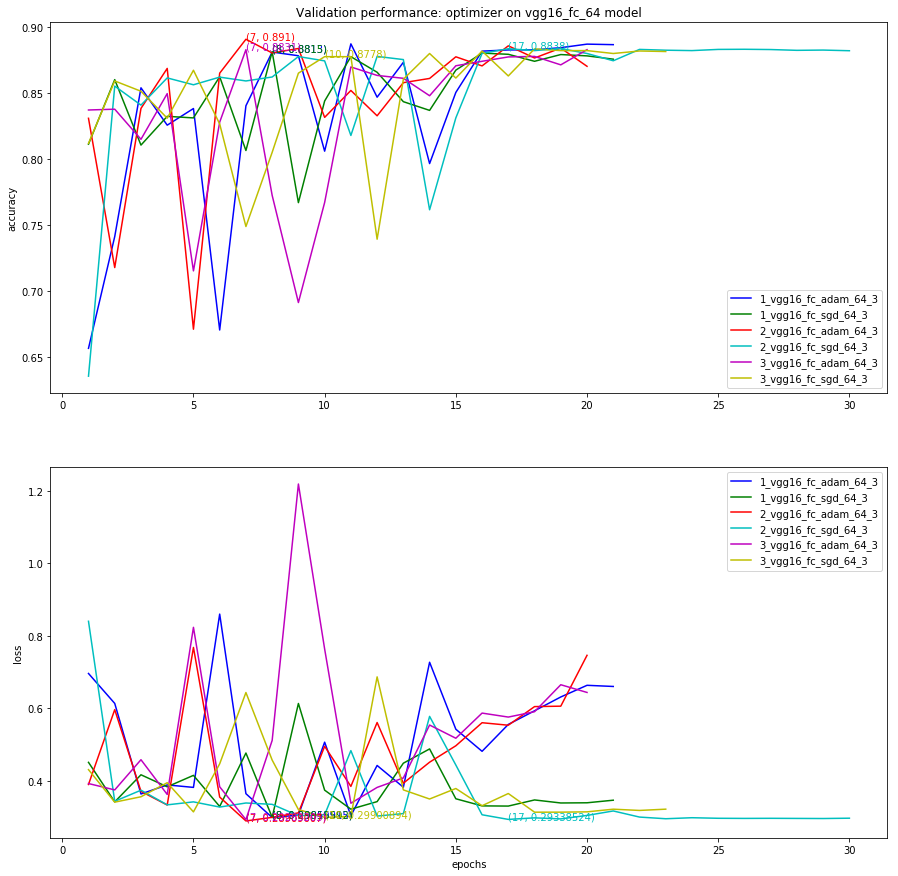

In [106]:
n = len(fname)
color = colorhex(n)

plt.figure(figsize=(15,15))
plt.subplot(2,1,2)
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim((0, 5))

index = []
for i in range(n):
    index.append(plotloss(fname[i], i))

plt.legend()

plt.subplot(2,1,1)
plt.ylabel('accuracy')
# plt.ylim((0, 5))

for i in range(n):
    plotacc(fname[i], i, index[i])
    
plt.title('Validation performance: optimizer on vgg16_fc_64 model')
plt.legend()
plt.savefig('E:\\deeplearning\\Hepatocarcinomes\\models\\5x\\test_dataAmount\\optimizer_vgg16_fc_64',dpi=300)
plt.show()

In [95]:
n

12